# **Credit card fraud dection using machine learning** 



In this notebook, I will using ML techniques to detect fraud in a credit card dataset

# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Importing Required Libraries">Importing Required Libraries</a></li>
            <li><a href="#Load in dataset">Load in dataset</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data preparation">Data Description</a></li>
            <li><a href="#Split data into trainign and testing set">Split data into trainign and testing set</a></li>
            <li><a href="#Standardise data">Standardise data</a></li>
        </ol>
    </li>
    </li>
    <li>
        <a href="#Logistic regression">Logistic regression</a>
        <ol>
            <li><a href="#Model development">Model development</a></li>
            <li><a href="#Model accuracy">Model accuracy</a></li>
            <li><a href="#Model performance">Model performance</a></li>
            <li><a href="#Model assessment">Model assessment</a></li>
        </ol>
    </li>
</ol>


# Objectives

In this notebook I will predict credit card fraud with:
- Logistic regression
- Supervised ML models



# Setup

### Importing Required Libraries

Libraries required for this notebook will be imported here

In [2]:
import pandas as pd

### Load in data

Data used: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [3]:
data = pd.read_csv("..\data\kaggel_credit_card_fraud_detection\creditcard.csv")
data.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


### Split data into training and testing set

In [4]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=["Time", "Class"])
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   
X_train.shape, X_test.shape, y_train.shape, y_test.shape  

((227845, 29), (56962, 29), (227845,), (56962,))

In [6]:
#check amounts of fraud and non-fraud
y_train.value_counts(), y_test.value_counts()

(Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

### Standardise data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scenario

Predict credit card fraud various ML models, creating, testing and validating them

### Data Description ###

The dataset used for this visualization project contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Features V1-V28 have been deduced by PCA, and have names omitted due to confidentiality

The dataset includes the following variables:
<br>1. Time: Seconds elapsed between each transaction and the first transaction in the dataset.
<br>2-29. V1 - V28: Anonymised features deduced by PCA
<br>30. Amount: transaction Amount, this feature can be used for example-dependant cost-sensitive learning
<br>31. Class: Responce varialbe for fraud classification (0 = not fraud, 1 = fraud)




## Logistic regression

### Model development

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



C:\Users\aiden\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model accuracy

In [17]:
from sklearn.metrics import roc_auc_score
y_probs = model.predict_proba(X_test)[:, 1]  # Extracting probabilities for class 1
auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {auc:.4f}")


ROC-AUC Score: 0.9601


In [18]:
from sklearn.metrics import classification_report
#Precision, Recall, and F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.59      0.69        98

    accuracy                           1.00     56962
   macro avg       0.91      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



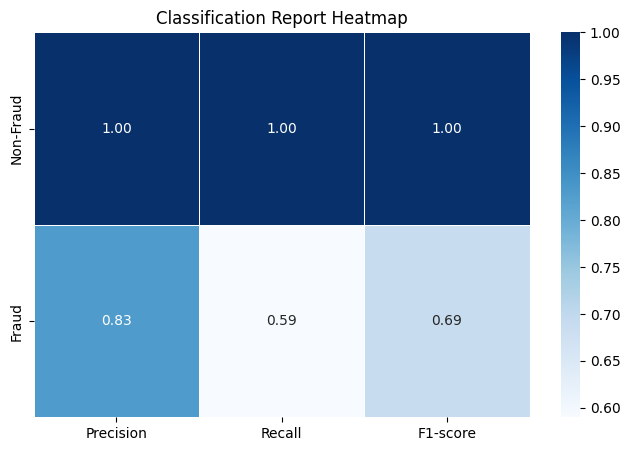

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Metrics from classification report
labels = ["Precision", "Recall", "F1-score"]
fraud = [0.83, 0.59, 0.69]
non_fraud = [1.00, 1.00, 1.00]

# Creating the DataFrame
metrics = np.array([non_fraud, fraud])
df = pd.DataFrame(metrics, columns=labels, index=["Non-Fraud", "Fraud"])

# Plotting
plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.show()


### Model performance

**Non-Fraud**

Precision - 1.00 - Few if no false positives; Good classification of non-fraudulent transactions

Recall - 1.00 - Model identifies all legitimate transactions

F1-score - 1.00 - Perfect balance of precision and recall

**Fraud**

Precisions - 0.83 - 83% of true positives identified, 17% of fraud predictions are false positives

Recall - Model only catches 59% of actual fraud cases, some cases no identified

F1-score -  Reasonable balance but can be improved

### Model assessment